In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
train_data=pd.read_csv("/content/fnn_train.csv")
test_data=pd.read_csv("/content/fnn_test.csv")
validation_data=pd.read_csv("/content/fnn_dev.csv")

#### Training data which consists of Fake and Real labels

In [ ]:
train_data.head(3)

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,3106,2011-01-25T06:00:00-05:00,Joe Wilkinson,A national organization says Georgia has one o...,['http://www.ajc.com/news/georgia-politics-ele...,['A coalition of government watchdog groups la...,A coalition of government watchdog groups last...,fake
1,5655,2012-04-02T11:42:20-04:00,Rick Scott,"Says Barack Obama's health care law ""will be t...",['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...,['As Supreme Court justices embarked on three ...,As Supreme Court justices embarked on three da...,fake
2,3506,2011-04-01T09:49:05-04:00,J.D. Alexander,Says the Southwest Florida Water Management Di...,['http://www.tampabay.com/news/politics/gubern...,"[""Here's a new one: The Senate budget committe...",Here's a new one: The Senate budget committee ...,fake


In [ ]:
test_data.head(3)

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,1678,2010-04-11T16:37:40-04:00,Jon Kyl,"""President Obama himself attempted to filibust...",['http://abcnews.go.com/ThisWeek/video/supreme...,['U.S. Supreme Court Justice John Paul Stevens...,U.S. Supreme Court Justice John Paul Stevens a...,real
1,1820,2010-05-23T18:11:09-04:00,Michael Steele,"In Hawaii, ""they don't have a history of throw...",['http://www.starbulletin.com/news/bulletin/94...,"[""On ABC's This Week, the chairmen of the Repu...","On ABC's This Week, the chairmen of the Republ...",real
2,1624,2010-03-26T10:24:21-04:00,John Boehner,"""Our national debt ... is on track to exceed t...",['http://www.desmoinesregister.com/article/201...,['Ever since Barack Obama became president and...,Ever since Barack Obama became president and b...,real


In [ ]:
validation_data.head(3)

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,1636,2010-03-28T17:45:34-04:00,Charlie Crist,"Rubio's tax swap proposal ""would have been a m...",['http://blogs.tampabay.com/buzz/files/040307l...,['Gov. Charlie Crist launched what amounts to ...,Gov. Charlie Crist launched what amounts to a ...,fake
1,4352,2011-08-29T06:00:00-04:00,Bobby Scott,"""The estimated savings of this (debt ceiling) ...",['http://www.bobbyscott.house.gov/index.php?op...,"['U.S. Rep. Bobby Scott, D-3rd, was not please...","U.S. Rep. Bobby Scott, D-3rd, was not pleased ...",real
2,16471,2019-02-12T17:35:38-05:00,Wisconsin Republican Legislative leaders,"Foxconn has already ""made a positive impact ac...",['https://www.wispolitics.com/2019/sen-fitzger...,"[""Amid reports questioning Foxconn Technology ...",Amid reports questioning Foxconn Technology Gr...,fake


In [ ]:
train_data['fullText_based_content'][1]

'As Supreme Court justices embarked on three days of oral arguments in the historic lawsuit over the health care law, Gov. Rick Scott went on a national TV media blitz and said one of the most regurgitated falsehoods of the health care debate.\n"I ran on a campaign of getting our state back to work. This will be the biggest job-killer ever," he said on Fox and Friends on March 26, 2012. "I mean, think about it, the government can’t buy health care cheaper than anybody else can. And we have these unbelievable penalties, which will have to go up."\n"It will be a big job-killer because it will cost too much," he said.\nPolitiFact has examined similar claims about the law’s job-killing effect from House Republican Leader Eric Cantor , the U.S. Chamber of Commerce and former U.S. Senate candidate and former Florida House Majority Leader Adam Hasner . None fared well on our Truth-O-Meter.\nWe wanted to rule on Scott’s statement given renewed debate on the law. We’ll explain how we examined t

####Cleaning

In [ ]:
processed_features = []

for sentence in range(0, len(train_data)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(train_data['fullText_based_content'][sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    #making whole text lowercase
    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
processed_feature

'outlining his education platform on may 28 former vice president and 2020 democratic presidential contender joe biden put the spotlight on an often ignored mental health problem kids access to mental health care in policy paper released at town hall in houston biden said the current school psychologist to student ratio in this country is roughly 1 400 to 1 while experts say it should be at most 700 to 1 that matters because children mental health care issues are often detected in school settings the school psychologists provide the first line of treatment and often set in motion any necessary referrals to specialists their role is complicated by the fact that beyond school walls there is serious shortage of adolescent and child psychiatrists it a problem biden said given that too many of our children are not getting the mental health care they need from trained professional this talking point about school psychologist ratios suggests glaring gap in health care services and in an area 

In [ ]:
train_data['fullText_based_content']=processed_features

In [ ]:
train_data

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,3106,2011-01-25T06:00:00-05:00,Joe Wilkinson,A national organization says Georgia has one o...,['http://www.ajc.com/news/georgia-politics-ele...,['A coalition of government watchdog groups la...,a coalition of government watchdog groups last...,fake
1,5655,2012-04-02T11:42:20-04:00,Rick Scott,"Says Barack Obama's health care law ""will be t...",['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...,['As Supreme Court justices embarked on three ...,as supreme court justices embarked on three da...,fake
2,3506,2011-04-01T09:49:05-04:00,J.D. Alexander,Says the Southwest Florida Water Management Di...,['http://www.tampabay.com/news/politics/gubern...,"[""Here's a new one: The Senate budget committe...",here a new one the senate budget committee cha...,fake
3,3450,2011-03-21T12:20:02-04:00,Paul Ryan,"""The Congressional Budget Office has this econ...",['http://www.cnn.com/2011/POLITICS/03/17/gop.b...,"['Recently, House Budget chairman Paul Ryan, R...",recently house budget chairman paul ryan wis a...,real
4,4776,2011-11-13T07:30:00-05:00,Rodney Frelinghuysen,"Says the Treasury Department ""says 41 percent ...",['http://frelinghuysen.house.gov/index.cfm?sec...,['The millionaires’ tax proposal made its late...,the millionaires tax proposal made its latest ...,fake
...,...,...,...,...,...,...,...,...
15207,7125,2012-11-28T16:57:04-05:00,John Cornyn,Says veterans’ disability claims backlog doubl...,['https://twitter.com/johncornyn/status/270488...,"['In legislation filed this week , U.S. Sen. J...",in legislation filed this week s sen john corn...,real
15208,17742,2020-01-09T15:05:09-05:00,Bernie Sanders,"""In 2018, Biden lauded Paul Ryan for proposing...",['https://bernie.substack.com/p/bern-notice-be...,['Sen. Bernie Sanders argues that former Vice ...,sen bernie sanders argues that former vice pre...,fake
15209,16988,2019-06-18T12:06:24-04:00,Viral image,"Says Michael Bloomberg said, ""I have known Tru...",['https://www.facebook.com/liberalamerica.life...,"['Ready for some ""billionaire talk,"" as a rece...",ready for some billionaire talk as recent face...,fake
15210,5758,2012-04-18T09:00:00-04:00,AFSCME,"In labor negotiations with city employees, Mil...",['http://www.wseu-24.org/issue_barrett_tom_201...,['We know why labor unions stand against Repub...,we know why labor unions stand against republi...,fake


In [ ]:
train_data['fullText_based_content'][1]

'as supreme court justices embarked on three days of oral arguments in the historic lawsuit over the health care law gov rick scott went on national tv media blitz and said one of the most regurgitated falsehoods of the health care debate ran on campaign of getting our state back to work this will be the biggest job killer ever he said on fox and friends on march 26 2012 mean think about it the government can buy health care cheaper than anybody else can and we have these unbelievable penalties which will have to go up it will be big job killer because it will cost too much he said politifact has examined similar claims about the law job killing effect from house republican leader eric cantor the s chamber of commerce and former s senate candidate and former florida house majority leader adam hasner none fared well on our truth meter we wanted to rule on scott statement given renewed debate on the law we ll explain how we examined the job killing rhetoric in the past before getting aro

In [ ]:
stop = stopwords.words('english')

#### removing stop words from the text

In [ ]:
train_data['fullText_based_content'] = train_data['fullText_based_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
train_data['fullText_based_content'][1]

'supreme court justices embarked three days oral arguments historic lawsuit health care law gov rick scott went national tv media blitz said one regurgitated falsehoods health care debate ran campaign getting state back work biggest job killer ever said fox friends march 26 2012 mean think government buy health care cheaper anybody else unbelievable penalties go big job killer cost much said politifact examined similar claims law job killing effect house republican leader eric cantor chamber commerce former senate candidate former florida house majority leader adam hasner none fared well truth meter wanted rule scott statement given renewed debate law explain examined job killing rhetoric past getting around scott specifically none folks made claim could back valid projections job losses instead presented partisan reports skewed interpretations independent reports evidence one republican document obamacare budget busting job killing health care law claimed independent analyses determin

In [ ]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #print(nltk_tagged)
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [ ]:
for sentence in range(len(train_data['fullText_based_content'])):
    train_data['fullText_based_content'][sentence]=lemmatize_sentence(train_data['fullText_based_content'][sentence])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
words_in_dataset=[words.split() for words in train_data['fullText_based_content']]

In [ ]:
len(words_in_dataset)

15212

In [ ]:
just_words=[]
for i in words_in_dataset:
  for j in i:
    just_words.append(j)

In [ ]:
len(just_words)

7064233

https://stackoverflow.com/questions/47557563/lemmatization-of-all-pandas-cells

In [ ]:
from matplotlib import rcParams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=274).generate(str(just_words))

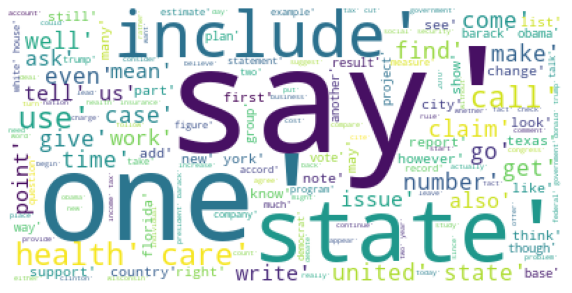

In [ ]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from collections import Counter
import collections

In [ ]:
counts=collections.Counter(just_words)

In [ ]:
counts.most_common(25)

[('say', 113766),
 ('state', 65683),
 ('year', 43550),
 ('would', 40145),
 ('percent', 38551),
 ('tax', 37095),
 ('one', 28927),
 ('make', 26945),
 ('claim', 25352),
 ('law', 24332),
 ('people', 23565),
 ('time', 22955),
 ('report', 22333),
 ('obama', 21958),
 ('also', 21844),
 ('new', 21487),
 ('number', 20801),
 ('million', 20719),
 ('health', 20717),
 ('bill', 20348),
 ('include', 19694),
 ('take', 19503),
 ('use', 19440),
 ('go', 19204),
 ('vote', 18955)]

In [ ]:
df_counts = pd.DataFrame(counts.most_common(25),
                             columns=['words', 'count'])

df_counts.head()

,words,count
0,say,113766
1,state,65683
2,year,43550
3,would,40145
4,percent,38551


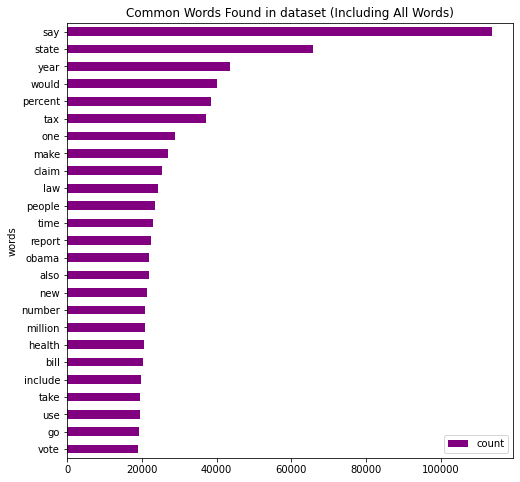

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df_counts.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in dataset (Including All Words)")

plt.show()

In [ ]:
counts_label=collections.Counter(train_data['label_fnn'])

In [ ]:
counts_label

Counter({'fake': 7621, 'real': 7591})

In [ ]:
df_label_counts = pd.DataFrame(counts_label.most_common(2), columns=['label', 'count'])

df_label_counts.head()

,label,count
0,fake,7621
1,real,7591


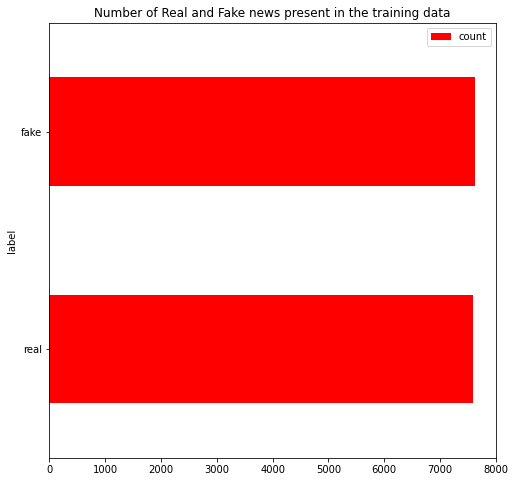

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
df_label_counts.sort_values(by='count').plot.barh(x='label',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Number of Real and Fake news present in the training data")

plt.show()